In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Re_10_kHz_IM_10_kHz.csv')

(Text(0.5, 0, 'Re 10 kHz'), Text(0, 0.5, 'Im 10 kHz'))

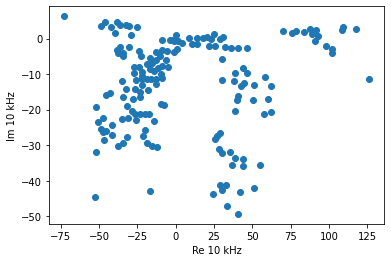

In [3]:
plt.scatter(df['Re 10 kHz'],df['Im 10 kHz'])
plt.xlabel('Re 10 kHz'),plt.ylabel('Im 10 kHz')

#

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455
FEATURES = ['Re 10 kHz']
TARGET = ['Im 10 kHz']

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
modelo_knn = KNeighborsRegressor()

modelo_knn.fit(X_treino, y_treino)

previsao = modelo_knn.predict(X_teste)

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
y_verdadeiro = y_teste
y_previsao = modelo_knn.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo k-NN foi de {round(RMSE,2)}.")

O RMSE do modelo k-NN foi de 12.34.


#

In [10]:
import seaborn as sns
from sklearn.cluster import KMeans

In [11]:
X_treino = df.iloc[:,:2]

In [12]:
from sklearn import preprocessing

In [13]:
#X_treino_norm = (X_treino)
X_treino_norm = preprocessing.normalize(X_treino)
X_teste_norm = preprocessing.normalize(X_teste)

In [14]:
# “lloyd”, “elkan”, “auto”, “full”

kmeans = KMeans(n_clusters = 4, random_state = 0, n_init=10)

kmeans.fit(X_treino_norm)

KMeans(n_clusters=4, random_state=0)

In [15]:
classificacao = list(kmeans.labels_)

for i in range(len(classificacao)):
    val = classificacao[i]
    
    if val == 0:
        classificacao[i] = 'Seeds'
    elif val == 1:
        classificacao[i] = 'Organisms'
    elif val == 2:
        classificacao[i] = 'Plastics'
    elif val == 3:
        classificacao[i] = 'Bubbles'

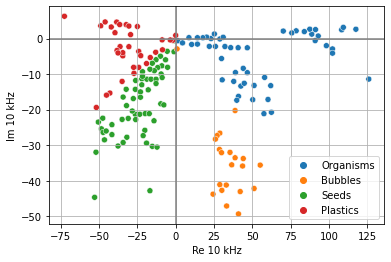

In [16]:
sns.scatterplot(data = X_treino, x = 'Re 10 kHz', y = 'Im 10 kHz', hue = classificacao)

plt.axvline(x=0,color='gray'),plt.axhline(y=0,color='gray')
plt.grid()
plt.show()

#

In [17]:
df['Classificacao'] = classificacao

In [18]:
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455
FEATURES = ['Re 10 kHz','Im 10 kHz']
TARGET = ['Classificacao']

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
modelo_knn = KNeighborsClassifier()

modelo_knn.fit(X_treino, y_treino.ravel())

previsao = modelo_knn.predict(X_teste)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
y_verdadeiro = y_teste
y_previsao = modelo_knn.predict(X_teste)

acc = accuracy_score(y_verdadeiro, y_previsao)

print(f"O RMSE do modelo k-NN foi de {round(acc,2)}.")

O RMSE do modelo k-NN foi de 0.88.
